In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('palm_features.csv')

Finding the overall trend, through all waterings

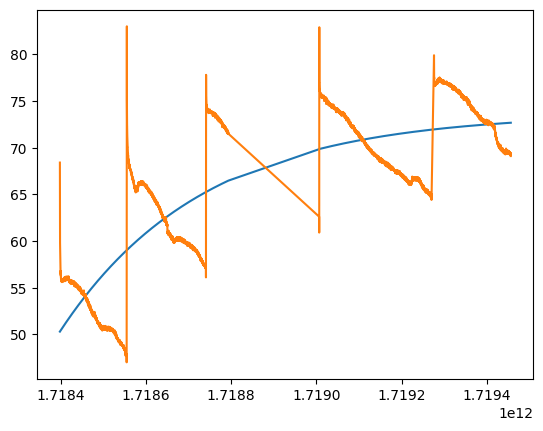

[-1.03849783e+01 -2.97783874e-09  7.36677582e+01  1.71867030e+12]
[[ 1.35140440e+12 -2.72881444e-07 -2.19897064e+02  4.36020013e+19]
 [-2.72881444e-07  3.20406396e-21  6.09833960e-12 -8.80401343e+00]
 [-2.19897064e+02  6.09833960e-12  1.49922080e-02 -7.09416557e+09]
 [ 4.36020013e+19 -8.80401343e+00 -7.09416557e+09  1.40678432e+27]]
0.664202601881142


In [8]:
from scipy.optimize import curve_fit

e = 2.718281828459045
def exp(x, a, b, c, t):
    return a * e**(b*(x-t))+c

popt, pcov = curve_fit(exp, df['time_stamp'], df['soil_moisture_1'], p0=[-20, -0.0000000008, 70, 1719463764000], maxfev=10000000)

plt.plot(df['time_stamp'], exp(df['time_stamp'], *popt))
plt.plot(df['time_stamp'], df['soil_moisture_1'])
plt.show()

print(popt)
print(pcov)

# r2
residuals = df['soil_moisture_1'] - exp(df['time_stamp'], *popt)
ss_res = sum(residuals**2)
ss_tot = sum((df['soil_moisture_1']-df['soil_moisture_1'].mean())**2)
r2 = 1 - (ss_res / ss_tot)
print(r2)
df["residuals"] = residuals



In [9]:
df.to_csv('palm_features_residuals.csv', index=False)

In [ ]:
# plot the residuals (good for local model??)
plt.plot(df['time_stamp'], residuals)
plt.show()